In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target 

In [5]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
y=pd.DataFrame(iris.target,columns=['target'])

In [10]:
df=pd.concat([x,y],axis=1)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df.duplicated().sum()

np.int64(1)

In [14]:
df=df.drop_duplicates()

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0, 0.5, 'sepal width (cm)')

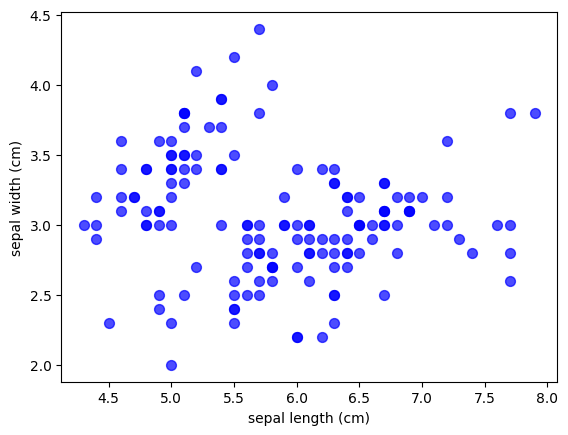

In [36]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='blue', s=50, alpha=0.7)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

KMeans clustering partitions data into 𝑘 clusters by minimizing the sum of squared distances between data points and their corresponding cluster centroid.
The algorithm iteratively assigns data points to the nearest centroid and recalculates centroids until convergence.

In [16]:
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

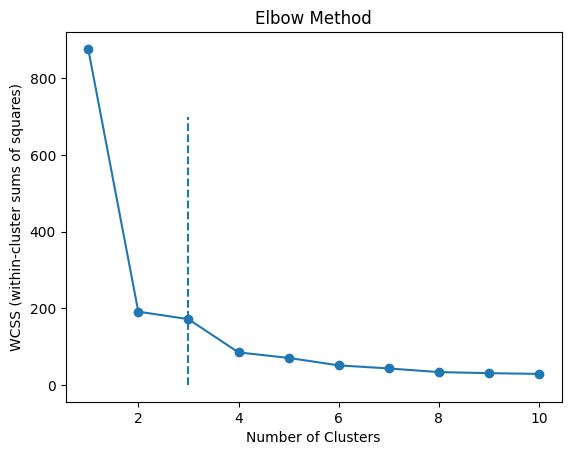

In [49]:
# Try different values of k (from 1 to 10)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++')
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), sse, marker='o')
plt.vlines(x=3,ymin=0,ymax=700,linestyles='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (within-cluster sums of squares)')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [44]:
df['Cluster'] = kmeans.fit_predict(df)

C:\Users\sruth\AppData\Local\Temp\ipykernel_18048\3031486793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df)


In [45]:
df['Cluster'].unique()

array([2, 1, 0], dtype=int32)

In [50]:
df['Cluster']

0      2
1      1
2      1
3      1
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Name: Cluster, Length: 149, dtype: int32

C:\Users\sruth\AppData\Local\Temp\ipykernel_18048\1282316794.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


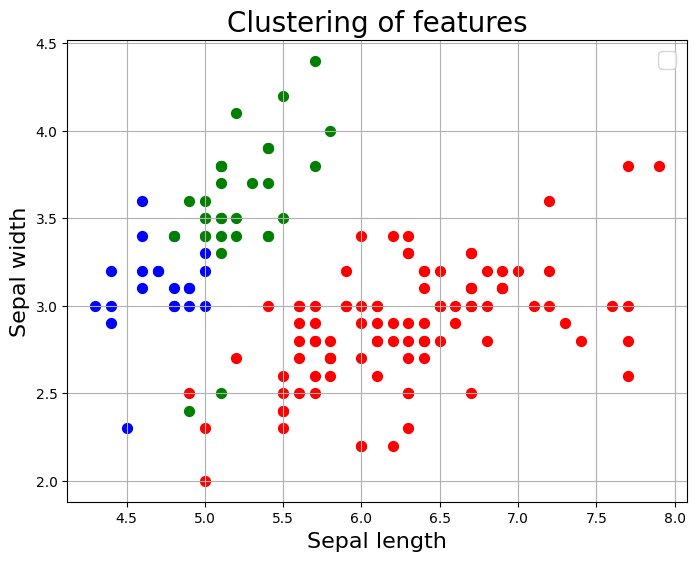

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(df[df['Cluster'] == 0].iloc[:, 0], df[df['Cluster'] == 0].iloc[:, 1], s=50, c='red')
plt.scatter(df[df['Cluster'] == 1].iloc[:, 0], df[df['Cluster'] == 1].iloc[:, 1], s=50, c='blue')
plt.scatter(df[df['Cluster'] == 2].iloc[:, 0], df[df['Cluster'] == 2].iloc[:, 1], s=50, c='green')

plt.title('K-Means Clustering')
plt.title('Clustering of features',fontsize=20)
plt.xlabel('Sepal length',fontsize=16)
plt.ylabel('Sepal width',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

 Hierarchical Clustering

In [60]:
import scipy.cluster.hierarchy as sch

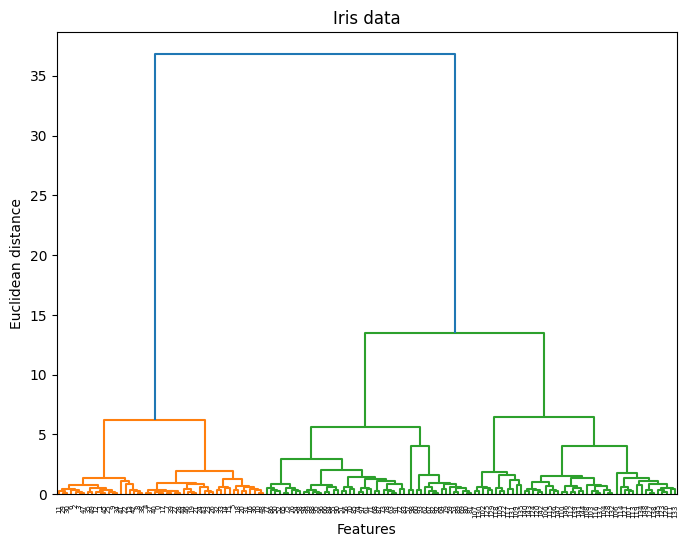

In [62]:
plt.figure(figsize=(8,6))
plt.title('Iris data')
plt.xlabel('Features')
plt.ylabel('Euclidean distance')
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering as ac

In [63]:
hc=ac(n_clusters=3,linkage='ward')

In [66]:
df['Cluster_h']=hc.fit_predict(df)

C:\Users\sruth\AppData\Local\Temp\ipykernel_18048\2459016522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_h']=hc.fit_predict(df)


In [67]:
df['Cluster_h']

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Cluster_h, Length: 149, dtype: int64

C:\Users\sruth\AppData\Local\Temp\ipykernel_18048\2104956857.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


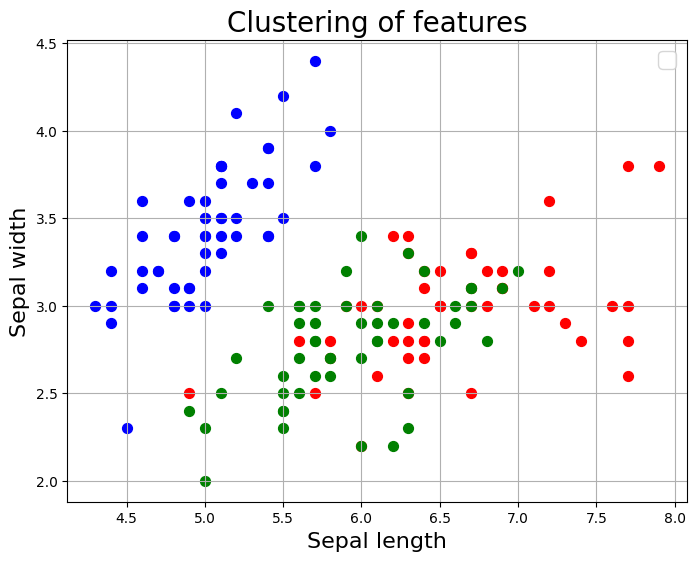

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(df[df['Cluster_h'] == 0].iloc[:, 0], df[df['Cluster_h'] == 0].iloc[:, 1], s=50, c='red')
plt.scatter(df[df['Cluster_h'] == 1].iloc[:, 0], df[df['Cluster_h'] == 1].iloc[:, 1], s=50, c='blue')
plt.scatter(df[df['Cluster_h'] == 2].iloc[:, 0], df[df['Cluster_h'] == 2].iloc[:, 1], s=50, c='green')

plt.title('K-Means Clustering')
plt.title('Clustering of features',fontsize=20)
plt.xlabel('Sepal length',fontsize=16)
plt.ylabel('Sepal width',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()